# Breast Cancer Image Classification And Predictions


### Dataset Used - [Breast Histopathology images](https://www.kaggle.com/paultimothymooney/breast-histopathology-images)

### Work Done by

- Shubham Bhadra 1914005 IT-A
- Harsh Khona 1914031 IT-A
- Mehul Parekh 1914044 IT-A
- Ansh Khatri 1914004 IT-A

#### Importing necessary modules

In [2]:
import pandas as pd
import numpy as np
import os
from glob import glob
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
from matplotlib.image import imread
import cv2
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.optimizers import Adam,Adagrad,Adadelta,SGD,RMSprop
from keras.layers import Dense , Dropout , Activation , Conv2D
from keras.layers import Flatten , MaxPool2D , MaxPooling2D , BatchNormalization
from keras.models import load_model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
import pickle
%matplotlib inline

#### Reading and converting image data to arrays

In [3]:
base = os.listdir('archive (2)/IDC_regular_ps50_idx5/')

In [4]:
class0 = []
class1 = []

for x in base:
    for y in os.listdir('archive (2)/IDC_regular_ps50_idx5/' + x + '/0'):        
        class0.append(y)

    for z in os.listdir('archive (2)/IDC_regular_ps50_idx5/' + x + '/1'):
        class1.append(z)

    

In [5]:
print(len(class0),len(class1))

198738 78786


In [6]:
sampled_class0 = random.sample(class0,78786)
sampled_class1 = random.sample(class1,78786)

In [7]:
sampled_class0_new = []
sampled_class1_new = []
for i in sampled_class0:
    newi = i.split('_')[0]
    sampled_class0_new.append('archive (2)/IDC_regular_ps50_idx5/' + newi + '/0/'+ i)
    
for j in sampled_class1:
    newi = j.split('_')[0]
    sampled_class1_new.append('archive (2)/IDC_regular_ps50_idx5/' + newi + '/1/'+ j )
    


In [8]:
for x in base:
    img = cv2.imread('archive (2)/IDC_regular_ps50_idx5/' + x + '/0/'+'12820_idx5_x3251_y801_class0.png')
    

In [9]:
def imageArrays(data,label):
    img_arrays = []
    for i in data:
        if i.endswith('png'):
            new_i = i.split('_')[0]
            for num in range(0,2):
                new_i_path = 'archive (2)/IDC_regular_ps50_idx5/' + new_i + '/'+ str(num) +'/'+ i
                img = cv2.imread(new_i_path,cv2.IMREAD_COLOR)
                img_sized = cv2.resize(img,(50,50), interpolation=cv2.INTER_LINEAR)
                img_arrays.append([img_sized , label])
                
    return img_arrays

In [10]:
from matplotlib.image import imread
import cv2

def imageArrays(data,label):
    img_arrays = []
    for i in data:
        if i.endswith('png'):
                img = cv2.imread(i,cv2.IMREAD_COLOR)
                img_sized = cv2.resize(img,(50,50), interpolation=cv2.INTER_LINEAR)
                img_arrays.append([img_sized , label])
                
    return img_arrays

In [11]:
class0_array = imageArrays(sampled_class0_new[:10000], 0)
class1_array = imageArrays(sampled_class1_new[:10000], 1)

In [12]:
combined_data = np.concatenate((class0_array,class1_array))
random.seed(42)
random.shuffle(combined_data)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [13]:
X = []
y = []

for features,labels in combined_data:
    X.append(features)
    y.append(labels)
    
X = np.array(X).reshape(-1,50,50,3)
X.shape

(20000, 50, 50, 3)

#### Splitting image arrays into test and training 

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(16000, 50, 50, 3) (4000, 50, 50, 3) (16000, 2) (4000, 2)


#### Creating Model

In [15]:
def createModel():
    model = Sequential()
    model.add(Conv2D(64,kernel_size=3,activation='relu',input_shape=(50,50,3)))
    model.add(Conv2D(32,kernel_size=3,activation='relu'))
    model.add(Flatten())
    model.add(Dense(2,activation='softmax'))
    adam = Adam(learning_rate=0.0001)
    model.compile(loss="binary_crossentropy",optimizer=adam,metrics=['accuracy'])
    
    return model


model = createModel()
    

history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=20,verbose=2,)
    

Epoch 1/20
500/500 - 74s - loss: 2.0440 - accuracy: 0.8336 - val_loss: 0.3441 - val_accuracy: 0.8673
Epoch 2/20
500/500 - 69s - loss: 0.3107 - accuracy: 0.8797 - val_loss: 0.3036 - val_accuracy: 0.8852
Epoch 3/20
500/500 - 70s - loss: 0.2634 - accuracy: 0.9021 - val_loss: 0.2893 - val_accuracy: 0.8967
Epoch 4/20
500/500 - 108s - loss: 0.2200 - accuracy: 0.9224 - val_loss: 0.2940 - val_accuracy: 0.9018
Epoch 5/20
500/500 - 100s - loss: 0.1773 - accuracy: 0.9416 - val_loss: 0.2914 - val_accuracy: 0.9020
Epoch 6/20
500/500 - 110s - loss: 0.1436 - accuracy: 0.9542 - val_loss: 0.3088 - val_accuracy: 0.9005
Epoch 7/20
500/500 - 117s - loss: 0.1197 - accuracy: 0.9631 - val_loss: 0.2800 - val_accuracy: 0.9187
Epoch 8/20
500/500 - 115s - loss: 0.0913 - accuracy: 0.9731 - val_loss: 0.3352 - val_accuracy: 0.9150
Epoch 9/20
500/500 - 123s - loss: 0.0726 - accuracy: 0.9785 - val_loss: 0.3426 - val_accuracy: 0.9170
Epoch 10/20
500/500 - 115s - loss: 0.0535 - accuracy: 0.9857 - val_loss: 0.3494 - val

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 46, 46, 32)        18464     
_________________________________________________________________
flatten (Flatten)            (None, 67712)             0         
_________________________________________________________________
dense (Dense)                (None, 2)                 135426    
Total params: 155,682
Trainable params: 155,682
Non-trainable params: 0
_________________________________________________________________


#### 1st 20 epochs

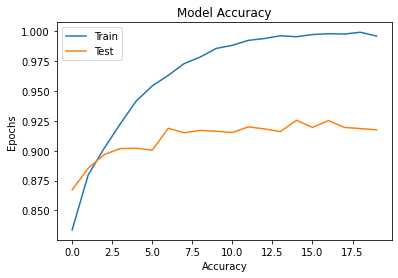

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Epochs')
plt.legend(['Train','Test'])
plt.show()

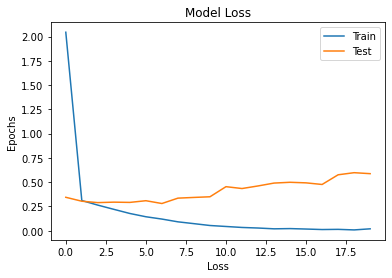

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Loss')
plt.ylabel('Epochs')
plt.legend(['Train','Test'])
plt.show()

#### Predicting images

In [19]:
def predict_img(img):

    test_img = load_img(img,target_size=(50,50))
    test_img_arr = np.array(test_img)
    test_img_arr = test_img_arr.reshape(-1,50,50,3)
    plt.imshow(test_img)
    predictions = np.argmax(model.predict(test_img_arr),axis=-1)

    
    if(predictions == 1):
        print(f'Breast IDC Cancer is present  | Prediction = {predictions}')
    
    else:
        print(f'Breast IDC Cancer not present | Prediction = {predictions}')
    
    
    
    

Breast IDC Cancer is present  | Prediction = [1]


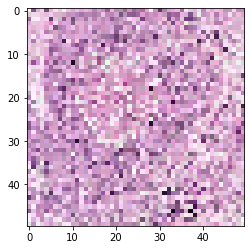

In [20]:
predict_img('test.jpg')

Breast IDC Cancer not present | Prediction = [0]


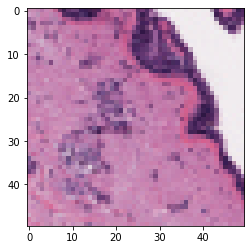

In [21]:
predict_img('test2.png')

In [26]:
model.save('model.h5')